In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_data = os.path.join("Data", "daily_all.csv")
df = pd.read_csv(path_data, index_col=0)

In [ ]:
df = df.drop(columns=["date", "week_start"])

In [12]:
df.head()

,workday,profession,work_mode,chronotype,age,sex,height_cm,mental_health_history,exercise_habit,caffeine_sensitivity,...,workouts_count,cheat_meals_count,has_intervention,intervention_diet_coaching,intervention_exercise_plan,intervention_meditation,intervention_sick_leave,intervention_therapy,intervention_vacation,intervention_workload_cap
user_id,,,,,,,,,,,,,,,,,,,,,
1,True,operations,onsite,morning,27,female,174,anxiety,medium,low,...,10,1,False,False,False,False,False,False,False,False
1,True,operations,onsite,morning,27,female,174,anxiety,medium,low,...,10,1,False,False,False,False,False,False,False,False
1,True,operations,onsite,morning,27,female,174,anxiety,medium,low,...,10,1,False,False,False,False,False,False,False,False
1,True,operations,onsite,morning,27,female,174,anxiety,medium,low,...,10,1,False,False,False,False,False,False,False,False
1,True,operations,onsite,morning,27,female,174,anxiety,medium,low,...,10,1,False,False,False,False,False,False,False,False


In [4]:
col_pred = [
    "intervention_medication",
    "intervention_sick_leave",
    "intervention_Therapy",
    "intervention_Vacation",
    "intervention_Workload_Cap",
    "intervention_diet_coaching",
    "intervention_exercise_plan",
    "has_intervention"
]

In [13]:
df.columns

Index(['workday', 'profession', 'work_mode', 'chronotype', 'age', 'sex',
       'height_cm', 'mental_health_history', 'exercise_habit',
       'caffeine_sensitivity', 'baseline_bmi', 'sleep_hours', 'sleep_quality',
       'work_hours', 'meetings_count', 'tasks_completed', 'emails_received',
       'commute_minutes', 'exercise_minutes', 'steps_count', 'caffeine_mg',
       'alcohol_units', 'screen_time_hours', 'social_interactions',
       'outdoor_time_minutes', 'diet_quality', 'calories_intake',
       'stress_level', 'mood_score', 'energy_level', 'focus_score',
       'work_pressure', 'weather_mood_impact', 'weight_kg', 'job_satisfaction',
       'perceived_stress_scale', 'anxiety_score', 'depression_score',
       'sleep_debt_hours', 'avg_weight_kg_week', 'workouts_count',
       'cheat_meals_count', 'has_intervention', 'intervention_diet_coaching',
       'intervention_exercise_plan', 'intervention_meditation',
       'intervention_sick_leave', 'intervention_therapy',
       'inter

In [ ]:
cols_constant = [
    "age", "sex", "height_cm", "profession", "work_mode", "chronotype", 
    "mental_health_history", "exercise_habit", "caffeine_sensitivity", "baseline_bmi"
]

df_unique_user = df.groupby(level=0).first()

df_unique_user = df_unique_user[cols_constant]

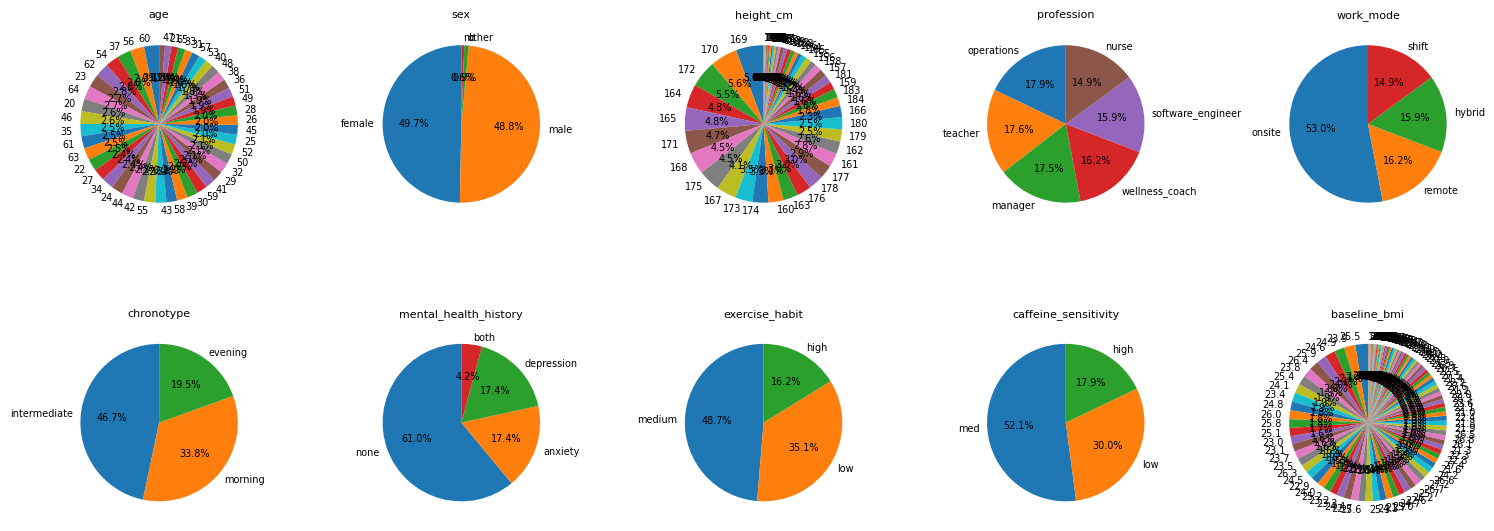

In [21]:
cols_per_row = 5

n_cols = len(df.columns)
n_rows = (n_cols // cols_per_row) + 1

plt.figure(figsize=(cols_per_row * 3, n_rows * 3))  

for i, col in enumerate(df_unique_user.columns):
    plt.subplot(n_rows, cols_per_row, i + 1)
    df_unique_user[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 7}
    )
    plt.title(col, fontsize=8)
    plt.ylabel('')

plt.tight_layout()
plt.show()